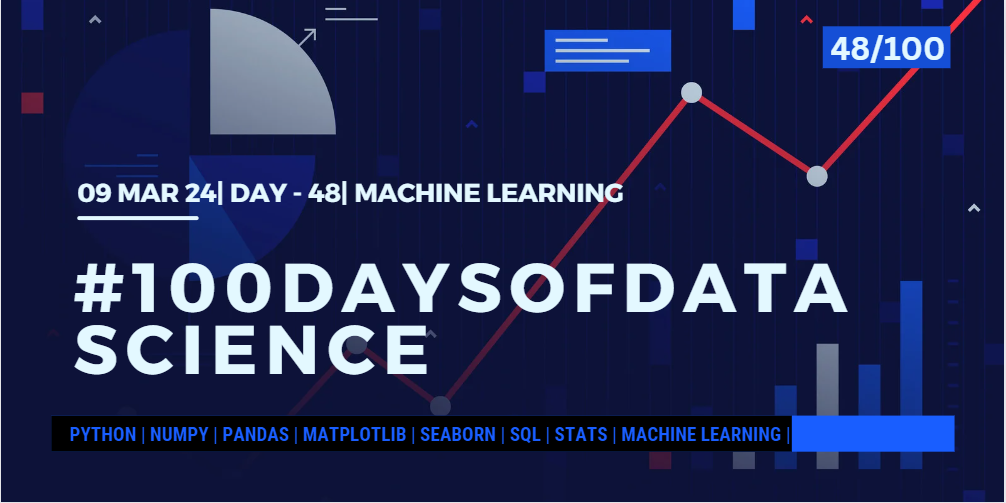

# <center>Decision Tree (DT)<center><hr style="border:4.5px solid #108999"></hr>

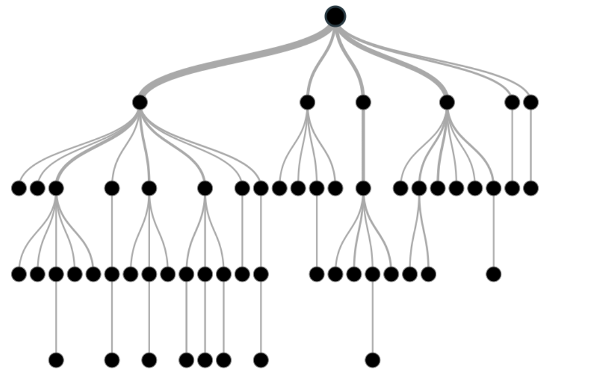

* A decision tree is a non-parametric supervised learning algorithm for classification and regression tasks. 
* It has a hierarchical tree structure consisting of a root node, branches, internal nodes, and leaf nodes. 
* Decision trees are used for classification and regression tasks, providing easy-to-understand models.
* Decision Tree Terminologies:
    * <b>Root Node:</b> The initial node at the beginning of a decision tree, where the entire population or dataset starts dividing based on various features or conditions.
    * <b>Decision Nodes:</b> Nodes resulting from the splitting of root nodes are known as decision nodes. These nodes represent intermediate decisions or conditions within the tree.
    * <b>Leaf Nodes:</b> Nodes where further splitting is not possible, often indicating the final classification or outcome. Leaf nodes are also referred to as terminal nodes.
    * <b>Sub-Tree:</b> Similar to a subsection of a graph being called a sub-graph, a sub-section of a decision tree is referred to as a sub-tree. It represents a specific portion of the decision tree.
    * <b>Pruning:</b> The process of removing or cutting down specific nodes in a decision tree to prevent overfitting and simplify the model.
    * <b>Branch / Sub-Tree:</b> A subsection of the entire decision tree is referred to as a branch or sub-tree. It represents a specific path of decisions and outcomes within the tree.
    * <b>Parent and Child Node:</b> In a decision tree, a node that is divided into sub-nodes is known as a parent node, and the sub-nodes emerging from it are referred to as child nodes. The parent node represents a decision or condition, while the child nodes represent the potential outcomes or further decisions based on that condition.
    
* <b>Advantages</b>
    - <b>Easy to interpret:</b> The Boolean logic and visual representations of decision trees make them easier to understand and consume. The hierarchical nature of a decision tree also makes it easy to see which attributes are most important, which isn’t always clear with other algorithms, like neural networks.
    - <b>Little to no data preparation required:</b> Decision trees have a number of characteristics, which make it more flexible than other classifiers. It can handle various data types—i.e. discrete or continuous values, and continuous values can be converted into categorical values through the use of thresholds. Additionally, it can also handle values with missing values, which can be problematic for other classifiers, like Naïve Bayes.  
    - <b>More flexible:</b> Decision trees can be leveraged for both classification and regression tasks, making it more flexible than some other algorithms. It’s also insensitive to underlying relationships between attributes; this means that if two variables are highly correlated, the algorithm will only choose one of the features to split on. 

* <b>Disadvantages</b>
    - <b>Prone to overfitting:</b> Complex decision trees tend to overfit and do not generalize well to new data. This scenario can be avoided through the processes of pre-pruning or post-pruning. Pre-pruning halts tree growth when there is insufficient data while post-pruning removes subtrees with inadequate data after tree construction. 
    - <b>High variance estimators:</b> Small variations within data can produce a very different decision tree. Bagging, or the averaging of estimates, can be a method of reducing variance of decision trees. However, this approach is limited as it can lead to highly correlated predictors.  
    - <b>More costly:</b> Given that decision trees take a greedy search approach during construction, they can be more expensive to train compared to other algorithms. 

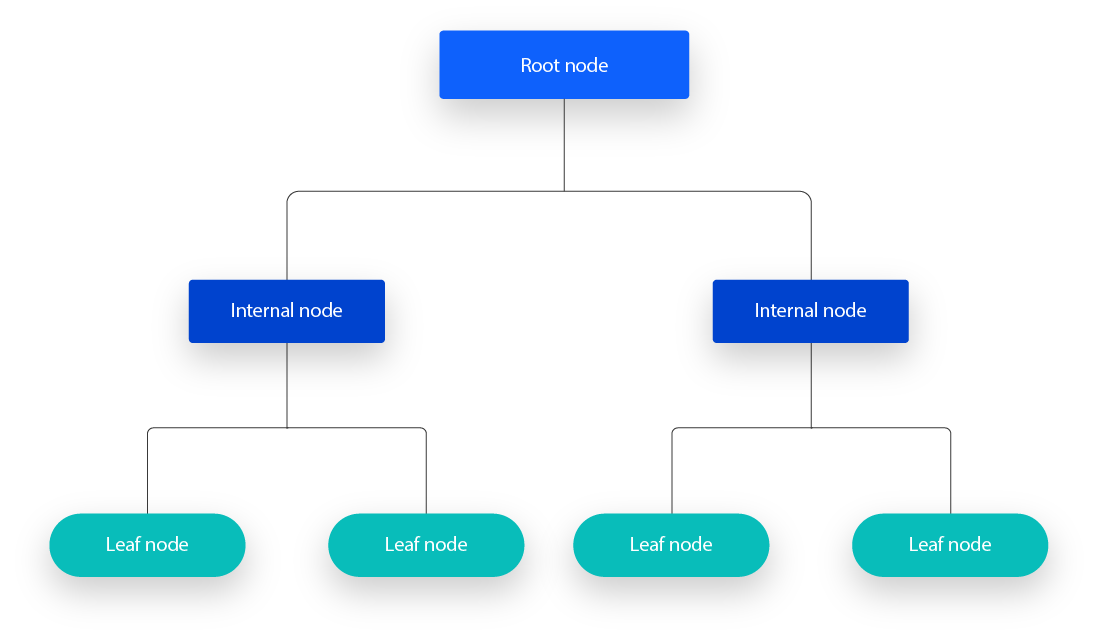

In [1]:
### Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
### Import the Dataset
df = pd.read_csv(r'C:\Users\hp\Desktop\100DaysOfDataScience\Day 48\car.data',header = 0)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.shape ### Checking Shape

(1727, 7)

In [4]:
df.describe() ### Get information of the Dataset

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df.columns ### Checking Columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [6]:
df.info() ### Checking Information About a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [7]:
df.isnull().sum() ### Checking Null Values in the Data

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [8]:
df1 = pd.DataFrame.copy(df)
df1.shape

(1727, 7)

In [9]:
df1.columns = ['BUYING','MAINT','DOORS','PERSONS','LUG_BOOT','SAFETY','CLASSES']
df1.tail()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASSES
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [10]:
for i in df1.columns:
    print({i:df1[i].unique()}) ### Checking Unique values in each columns

{'BUYING': array(['vhigh', 'high', 'med', 'low'], dtype=object)}
{'MAINT': array(['vhigh', 'high', 'med', 'low'], dtype=object)}
{'DOORS': array(['2', '3', '4', '5more'], dtype=object)}
{'PERSONS': array(['2', '4', 'more'], dtype=object)}
{'LUG_BOOT': array(['small', 'med', 'big'], dtype=object)}
{'SAFETY': array(['med', 'high', 'low'], dtype=object)}
{'CLASSES': array(['unacc', 'acc', 'vgood', 'good'], dtype=object)}


In [11]:
### Finding categorical variables
colname = [var for var in df1.columns if df1[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(colname)))
print('The categorical variables are :', colname)

There are 7 categorical variables

The categorical variables are : ['BUYING', 'MAINT', 'DOORS', 'PERSONS', 'LUG_BOOT', 'SAFETY', 'CLASSES']


In [12]:
### Converting all categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for x in colname:
    df1[x]=le.fit_transform(df1[x])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("Feature",x)
    print("Mapping", le_name_mapping)

Feature BUYING
Mapping {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
Feature MAINT
Mapping {'high': 0, 'low': 1, 'med': 2, 'vhigh': 3}
Feature DOORS
Mapping {'2': 0, '3': 1, '4': 2, '5more': 3}
Feature PERSONS
Mapping {'2': 0, '4': 1, 'more': 2}
Feature LUG_BOOT
Mapping {'big': 0, 'med': 1, 'small': 2}
Feature SAFETY
Mapping {'high': 0, 'low': 1, 'med': 2}
Feature CLASSES
Mapping {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3}


In [13]:
df2 = df1.copy()
df2.columns

Index(['BUYING', 'MAINT', 'DOORS', 'PERSONS', 'LUG_BOOT', 'SAFETY', 'CLASSES'], dtype='object')

In [14]:
### Spliting Data into X and y
X = df2.values[:,:-1]
y = df2.values[:,-1]
print('X:',X.shape)
print('*' * 13)
print('y:',y.shape)

X: (1727, 6)
*************
y: (1727,)


In [15]:
### Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
#x = scaler.fit_transform(x)
print(X)

[[ 1.34272909e+00  1.34272909e+00 -1.34272909e+00 -1.22563179e+00
   1.22563179e+00  1.22439044e+00]
 [ 1.34272909e+00  1.34272909e+00 -1.34272909e+00 -1.22563179e+00
   1.22563179e+00 -1.22439044e+00]
 [ 1.34272909e+00  1.34272909e+00 -1.34272909e+00 -1.22563179e+00
   7.09277656e-04  0.00000000e+00]
 ...
 [-4.46540306e-01 -4.46540306e-01  1.34117500e+00  1.22421323e+00
  -1.22421323e+00  0.00000000e+00]
 [-4.46540306e-01 -4.46540306e-01  1.34117500e+00  1.22421323e+00
  -1.22421323e+00  1.22439044e+00]
 [-4.46540306e-01 -4.46540306e-01  1.34117500e+00  1.22421323e+00
  -1.22421323e+00 -1.22439044e+00]]


In [16]:
y = y.astype(int) ### convert y in to integer always perform this operation

In [17]:
### Spliting into Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (1381, 6)
X_test:  (346, 6)
y_train:  (1381,)
y_test:  (346,)


In [18]:
#create a model object
model_DT = DecisionTreeClassifier(random_state=10)
#train the model object
model_DT.fit(X_train,y_train)
#predict using the model
y_pred = model_DT.predict(X_test)
print(y_pred)

[2 0 2 2 2 0 3 2 0 3 0 2 2 2 2 2 0 0 0 2 2 2 2 0 2 2 2 2 2 0 3 2 2 2 2 2 2
 2 3 0 2 2 2 2 2 2 0 2 1 2 1 2 2 2 2 2 0 2 2 0 2 3 2 1 2 2 2 2 2 2 0 2 0 0
 1 2 2 2 2 0 0 3 2 2 0 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 2 2 2 0 2 1 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 2 2 0 2 2 2 2 0 0 2 2 0 0
 2 2 2 0 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 1 2 0 2 2 0 0 0 2 2 0 2 2 2 2 2 0
 3 2 2 2 2 0 2 2 3 2 2 0 2 3 2 0 2 1 0 2 2 2 3 2 0 0 2 2 1 2 3 0 2 2 3 2 2
 0 0 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 0 2 0 2 2 2 0 2 3 1 2 0 0 0 2 2
 2 2 2 0 2 2 2 2 2 2 0 2 0 2 2 2 2 0 2 0 1 2 2 2 1 2 0 0 2 2 0 2 2 2 2 2 2
 0 3 2 2 2 2 0 2 2 2 0 2 2 2 0 1 2 2 2 2 2 2 2 2 2 2 3 2 0 2 0 0 0 2 0 3 2
 2 2 2 0 0 2 0 0 2 1 2 2 2]


In [19]:
# Checking Confusion metrics for the model
cfm = confusion_matrix(y_test,y_pred)
dff = pd.DataFrame(cfm)
dff.style.set_properties(**{"background-color": "#F3FFFF","color":"black","border": "2px solid black"})

,0,1,2,3
0,70,0,3,0
1,0,12,1,0
2,7,0,232,0
3,1,1,0,19


In [20]:
# Checking classification report score for the model
cr = classification_report(y_test,y_pred)
print("Classification report: ")
print(cr)

# Checking accuracy score for the model
acc = accuracy_score(y_test,y_pred)
print("Accuracy of the model: ",acc)

Classification report: 
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        73
           1       0.92      0.92      0.92        13
           2       0.98      0.97      0.98       239
           3       1.00      0.90      0.95        21

    accuracy                           0.96       346
   macro avg       0.95      0.94      0.94       346
weighted avg       0.96      0.96      0.96       346

Accuracy of the model:  0.9624277456647399


In [21]:
### Checking feature importance of X wrt y

print(list(zip(df2.columns[:-1],model_DT.feature_importances_)))

[('BUYING', 0.1312457867258618), ('MAINT', 0.26568557312090113), ('DOORS', 0.0481984518684389), ('PERSONS', 0.18708445040016275), ('LUG_BOOT', 0.10816536131991801), ('SAFETY', 0.2596203765647174)]


##### <center> Made with ❤️ by Zahid Salim Shaikh</center>